# Imports

The implementation of the project is entirely conducted in a Google Colab [57] notebook running Python 3 [58]. Colab is a web-based application that integrates live code, computational output, data visualisations, equations and explanatory text into a single document known as a notebook. Due to their flexibility and interactivity, notebook-based editors like Colab and Jupyter [59] have gained popularity with data scientists in recent years as code can be easily executed, modified and re-ran in sections while being combined with images, plots, and text to enhance explainability. For the aforementioned reasons, alongside Colab’s ability to allow written software to be stored on the cloud and executed on powerful Google GPUs free of charge, the decision was made to implement this project using Colab. 

In [39]:
pip install yfinance plotly pandas_datareader attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Regarding project dependencies, data preparation for the project relies on the Python libraries NumPy [60] and Pandas [61]. NumPy is a library that facilitates the usage of large multi-dimensional arrays, whereas Pandas provides data manipulation and analysis techniques not included in a standard python installation. Due to their speed, effectiveness, and ease of use both libraries have become ubiquitous in data science projects, with a large percentage of ML libraries requiring both as a pre-requisite. Available functionality from both libraries will be utilised to load, analyse and edit the financial datasets, presenting them in standardised formats able to be analysed by the vast majority of ML libraries. Visualisation for these datasets is provided by Plotly [62], Seaborn [63], and MatPlotLib [64], extensions of NumPy that provides interactive and customisable figures, plots, and charts with the added benefit of enabling these plots to be embedded in notebook-based editors such as Colab. Financial datasets will be loaded into the notebook using the popular library yfinance [65] so allow users to run the code without needing to download the relevant .csv files. For data pre-processing, the Scikit-Learn data analysis library is imported to utilise its evaluation metrics and feature scaling methods which provide normalisation and standardisation upon NumPy datasets, and the open-source PyWavelets [66] software is also utilised to provide the wavelet transformations used to de-noise the volatile financial data. The deep learning LSTM networks are developed with Keras [67] on top of Google TensorFlow, one of the largest and most powerful libraries for large-scale customisable Neural Networks, and the attention layer is implemented using Philippe Remy’s ‘Attention’ library [68].

In [40]:
# Data pre-processing
import numpy as np
import pandas as pd

# Load in data
import yfinance as yf

# Wavelet tranformation
import pywt

# Displaying text and graphs
from IPython.display import display

# Data scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Visualisation
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Model construction
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import load_model, Model
from attention import Attention
import keras
import tensorflow as tf

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

# Prediction Model

## Model Parameters

In [41]:
HIDDEN_LAYER_NODES = 50
PARAM_EPOCHS = 100
PARAM_LEARNING_RATE = 0.0001
PARAM_BATCH_SIZE = 50
PARAM_WINDOW_SIZE = 10
PARAM_DROPOUT = 0.2

## Pre-Proccesing

### Load & Explore Dataset


The necessary information to forecast stock prices will be accessed from Yahoo! Finance. Yahoo! Finance is a media site that delivers financial news, statistics and opinions and enables users to view and download the historical stock indices data of every publicly listed company and major stock index in the world. The historical data is available for download in the widely used .csv format and consists of import financial metrics from across the stock’s lifespan, including opening and closing prices, high and low prices, adjusted close prices and daily volume of shares traded. In Section 4.1, further information about the accessible financial data and certain instances will be provided. The data will be imported from Yahoo! Finance using yfinance and read into a NumPy dataframe prior to pre-processing.


The data using is the same data used in the original paper alonside three new datasets with the time periods and number of samples of each detailed below:


Stock Market Name  | Training Data Dates | Num. of Train Samples | Testing Data Dates | Num. of Test Samples | 
-------------------|------------------ | ------------ | ------------ | ------------ | 
DJIA       | 03/01/2000 - 16/05/2019 | 4873 | 17/05/2019 - 01/07/2019 | 31 |
HSI       | 02/01/2002 – 16/05/2019 | 4273 | 17/05/2019 – 01/07/2019 | 31 |
S&P 500       | 03/01/2000 - 16/05/2019 | 4873 | 17/05/2019 - 01/07/2019| 31 |
NASDAQ      | 01/01/2000 - 31/12/2015 | 4024 | 01/01/2016 - 01/01/2020| 1006 |
DAX     | 01/01/2000 - 18/12/2015 | 4057 | 19/12/2015 - 01/01/2020| 1015 |
FTSE 100      | 01/01/2000- 01/04/2016 | 4085 | 02/04/2016 - 01/01/2020| 1021 |

Run each cell to load each specific stock market data.

In [42]:
# Load HSI Stock prices
dataset_Name = 'HSI'
yahoo_index_code = '^HSI'
start_date = '2002-01-02'
end_date = '2019-07-02'
split_index = '2019/5/17'

In [43]:
# Load S&P500 Stock prices
dataset_Name = 'S&P500'
yahoo_index_code = '^GSPC'
start_date = '2000-01-03'
end_date = '2019-07-02'
split_index = '2019/5/17'

In [44]:
# Load DJIA Stock prices
dataset_Name = 'DJIA'
yahoo_index_code = '^DJI'
start_date = '2000-01-03'
end_date = '2019-07-02'
split_index = '2019/5/17'

In [45]:
# Load DAX Stock prices
dataset_Name = 'DAX '
yahoo_index_code = '^GDAXI'
start_date = '2000-01-01'
end_date = '2020-01-01'
split_index = '2015/12/18'

In [46]:
# Load FTSE Stock prices
dataset_Name = 'FTSE'
yahoo_index_code = '^FTSE'
start_date = '2000-01-01'
end_date = '2020-01-01'
split_index = '2016/01/04'

In [47]:
# Load NASDAQ Stock prices
dataset_Name = 'NASDAQ '
yahoo_index_code = '^IXIC'
start_date = '2000-01-01'
end_date = '2020-01-01'
split_index = '2015/12/31'

The necessary information to forecast stock prices will be accessed from Yahoo! Finance using the yfinance library. Yahoo Finance is a media site that delivers financial news, statistics and opinions and enables users to view and download the historical stock indices data of every publicly listed company and major stock index in the world. The historical data is available for download in the widely used .csv format and consists of import financial metrics from across the stock’s lifespan, including opening and closing prices, high and low prices, adjusted close prices and daily volume of shares traded. 

In [48]:
# Load dataframe from yahoo finance
df = yf.download(yahoo_index_code, period='1d', start = start_date, end = end_date)

# Sort the dataframe based on the date
df = df.sort_index()

# Display dataframe
display(df)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,4186.189941,4192.189941,3989.709961,4131.149902,4131.149902,1510070000
2000-01-04,4020.000000,4073.250000,3898.229980,3901.689941,3901.689941,1511840000
2000-01-05,3854.350098,3924.209961,3734.870117,3877.540039,3877.540039,1735670000
2000-01-06,3834.439941,3868.760010,3715.620117,3727.129883,3727.129883,1598320000
2000-01-07,3711.090088,3882.669922,3711.090088,3882.620117,3882.620117,1634930000
...,...,...,...,...,...,...
2019-12-24,8955.009766,8957.120117,8934.360352,8952.879883,8952.879883,1014520000
2019-12-26,8970.209961,9022.459961,8968.459961,9022.389648,9022.389648,1634920000
2019-12-27,9049.469727,9052.000000,8987.320312,9006.620117,9006.620117,1832200000


Here, the loaded stock market data is then visualised into an interactive graph using the PlotLy libary:

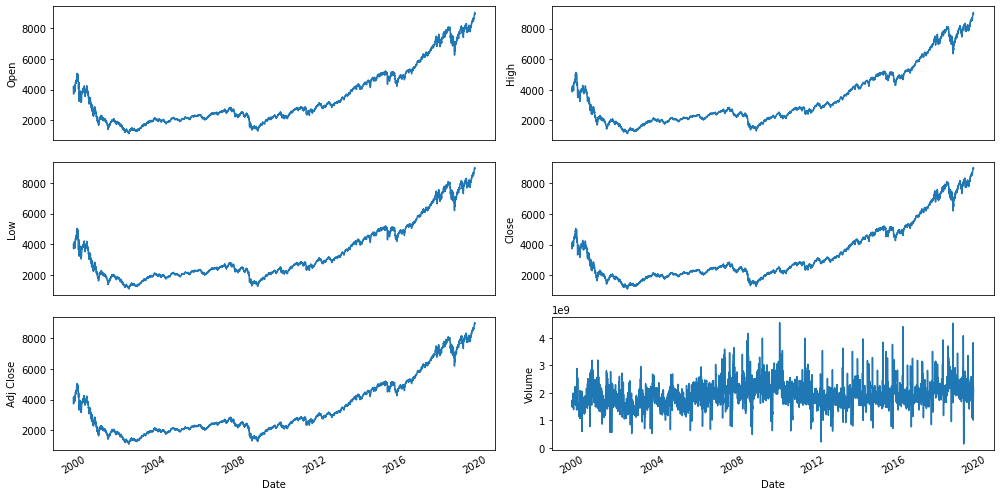

In [49]:
df_plot = df.copy()
ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
for i, ax in enumerate(fig.axes):
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

### Split Dataset into Train and Testing Data


Add labels to dataset used to train and evaluate the model. The labels are the next days closing price.

In [50]:
# Add labels
df['Label'] = (df['Close']).shift(-1)
df = df.dropna()
display(df)

,Open,High,Low,Close,Adj Close,Volume,Label
Date,,,,,,,
2000-01-03,4186.189941,4192.189941,3989.709961,4131.149902,4131.149902,1510070000,3901.689941
2000-01-04,4020.000000,4073.250000,3898.229980,3901.689941,3901.689941,1511840000,3877.540039
2000-01-05,3854.350098,3924.209961,3734.870117,3877.540039,3877.540039,1735670000,3727.129883
2000-01-06,3834.439941,3868.760010,3715.620117,3727.129883,3727.129883,1598320000,3882.620117
2000-01-07,3711.090088,3882.669922,3711.090088,3882.620117,3882.620117,1634930000,4049.669922
...,...,...,...,...,...,...,...
2019-12-23,8950.200195,8956.639648,8934.549805,8945.650391,8945.650391,2025450000,8952.879883
2019-12-24,8955.009766,8957.120117,8934.360352,8952.879883,8952.879883,1014520000,9022.389648
2019-12-26,8970.209961,9022.459961,8968.459961,9022.389648,9022.389648,1634920000,9006.620117


Commonly, in order to evaluate the performance of machine learning algorithms, the dataset is divided into two subgroups. The first subset, known as the training dataset, is utilised to fit the model. The second subset, known as the testing dataset, is used to evaluate this fit by comparing the model's projected values for a particular sample with the true values. The imported dataset will be divided into these two sections in order to quantify and compare model performance


In [51]:
def train_test_split(df):

  # Split dataset into input and lables
  x = (df.loc[:, : 'Volume'])
  y = (df.loc[:, 'Label': ])

  # Split input into training and testing
  x_train = x[:split_index]
  x_test = x[split_index:]

  # Split output into tradining and testing
  y_train = y[:split_index]
  y_test = y[split_index:]

  # drop last row of train sets to avoid sample repetition
  x_train.drop(x_train.tail(1).index,inplace=True)
  y_train.drop(y_train.tail(1).index,inplace=True) 

  return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = train_test_split(df)

In [52]:
# Display first 5 train samples and their labels
display(x_train.head())
display(x_train.shape)
display(y_train.head())
display(y_train.shape)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,4186.189941,4192.189941,3989.709961,4131.149902,4131.149902,1510070000
2000-01-04,4020.000000,4073.250000,3898.229980,3901.689941,3901.689941,1511840000
2000-01-05,3854.350098,3924.209961,3734.870117,3877.540039,3877.540039,1735670000
2000-01-06,3834.439941,3868.760010,3715.620117,3727.129883,3727.129883,1598320000
2000-01-07,3711.090088,3882.669922,3711.090088,3882.620117,3882.620117,1634930000


(4024, 6)

,Label
Date,
2000-01-03,3901.689941
2000-01-04,3877.540039
2000-01-05,3727.129883
2000-01-06,3882.620117
2000-01-07,4049.669922


(4024, 1)

In [53]:
# Display first 5 test samples and their labels
display(x_test.head())
display(x_test.shape)
display(y_test.head())
display(y_test.shape)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,5047.040039,5058.060059,5007.009766,5007.410156,5007.410156,1437480000
2016-01-04,4897.649902,4903.089844,4846.979980,4903.089844,4903.089844,2218420000
2016-01-05,4917.839844,4926.729980,4872.740234,4891.430176,4891.430176,1927380000
2016-01-06,4813.759766,4866.040039,4804.689941,4835.759766,4835.759766,2168620000
2016-01-07,4736.399902,4788.020020,4688.169922,4689.430176,4689.430176,2552590000


(1006, 6)

,Label
Date,
2015-12-31,4903.089844
2016-01-04,4891.430176
2016-01-05,4835.759766
2016-01-06,4689.430176
2016-01-07,4643.629883


(1006, 1)

### Wavelet Transform Testing Data

As discussed in Section 2.1.4, financial data is complicated and volatile resulting in random oscillations that interfere with the primary relevant signal. To combat this, a wavelet transformation will first be applied to the training and testing set using PyWavelets in order to reduce this noise and improve the accuracy of any forecasts made. The example code below demonstrates how a wavelet transformation with the haar function is applied to a given dataframe in Python, and Figure 10 shows the smoothing effect of the wavelet transformation on a given dataset. The wavelet transformation it is only applied on the training dataset, and as a consequence decreases the number of samples in the dataset by a factor of two. 

In [54]:
# Apply wavelet transformation on given dataframe
def wavelet(data):
  df_wav = pd.DataFrame()
  for column_name, column_data in data.items():
    (cA, cD) = pywt.dwt(column_data, 'haar')
    df_wav[column_name] = cA
  return df_wav

x_train_wav = wavelet(x_train)
y_train_wav = wavelet(y_train)

# Uncomment this block of text to remove the wavelet transformation
# x_train_wav = x_train
# y_train_wav = y_train

  # Display Datasets
display(x_train.head())
display(x_train.shape)
display(x_train_wav.head())
display(x_train_wav.shape)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,4186.189941,4192.189941,3989.709961,4131.149902,4131.149902,1510070000
2000-01-04,4020.000000,4073.250000,3898.229980,3901.689941,3901.689941,1511840000
2000-01-05,3854.350098,3924.209961,3734.870117,3877.540039,3877.540039,1735670000
2000-01-06,3834.439941,3868.760010,3715.620117,3727.129883,3727.129883,1598320000
2000-01-07,3711.090088,3882.669922,3711.090088,3882.620117,3882.620117,1634930000


(4024, 6)

,Open,High,Low,Close,Adj Close,Volume
0,5802.652555,5844.548632,5577.615822,5680.075526,5680.075526,2.136813e+09
1,5436.795576,5510.461912,5268.292168,5377.313670,5377.313670,2.357487e+09
2,5454.140926,5625.055678,5423.452561,5608.976077,5608.976077,2.352290e+09
3,5644.359555,5669.327537,5472.546936,5495.075261,5495.075261,2.277138e+09
4,5629.177993,5691.799411,5588.929531,5672.042889,5672.042889,2.215790e+09


(2012, 6)

Visualising the Wavelet Transformation on the opening price data for the training dataset:

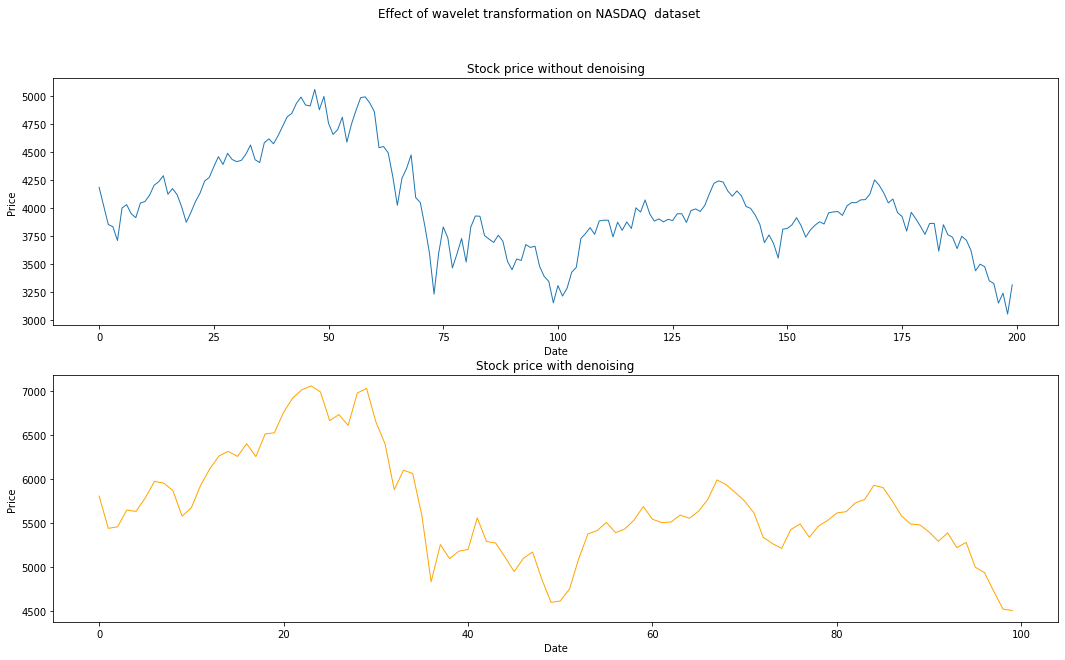

In [55]:
num_of_samples = 100

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Effect of wavelet transformation on ' + dataset_Name + ' dataset')
fig.set_size_inches(18, 10, forward=True)

ax1.plot(x_train.iloc[:num_of_samples*2, 0].reset_index().drop(columns=['Date']), label='Stock price without denoising', linewidth=1)
ax1.set_title('Stock price without denoising')
ax1.set(xlabel = 'Date', ylabel = 'Price')

ax2.plot(x_train_wav.iloc[:num_of_samples, 0], label='Stock price with denoising', color = 'orange', linewidth=1)
ax2.set_title('Stock price with denoising')
ax2.set(xlabel = 'Date', ylabel = 'Price')

plt.show()

### Normalise Testing Data

Because the input data consists of two categories of data, i.e., stock price and volume, standardisation and normalisation techniques are also applied using Scikit-Learn’s scaling methods. These feature scaling techniques are used to bring all metrics down to the same scale, ensuring that larger data features do not influence the model solely due to their magnitude and creating a smoother gradient descent during training, which aids backpropagation algorithms in reaching the cost function minima more quickly.

In [56]:
# Load the scaler, and normalise the input training dataset
scaler_X = MinMaxScaler(feature_range=(-1,1))
X_train_norm = scaler_X.fit_transform(x_train_wav)

# Normalise the output training dataset using a different scaler
scaler_y = MinMaxScaler(feature_range=(-1,1))
y_train_norm = scaler_y.fit_transform(y_train_wav)

In [57]:
# Display the shape of the wavelet transformed, normalised, training input dataset
display("Un-Normalised X_Train")
display(x_train.head())
display(x_train.shape)

# Display the shape of the wavelet transformed, normalised, training input dataset
display("Normalised X_Train")
display(pd.DataFrame(X_train_norm, columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']).head())
display(X_train_norm.shape)

'Un-Normalised X_Train'

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,4186.189941,4192.189941,3989.709961,4131.149902,4131.149902,1510070000
2000-01-04,4020.000000,4073.250000,3898.229980,3901.689941,3901.689941,1511840000
2000-01-05,3854.350098,3924.209961,3734.870117,3877.540039,3877.540039,1735670000
2000-01-06,3834.439941,3868.760010,3715.620117,3727.129883,3727.129883,1598320000
2000-01-07,3711.090088,3882.669922,3711.090088,3882.620117,3882.620117,1634930000


(4024, 6)

'Normalised X_Train'

,Open,High,Low,Close,Adj Close,Volume
0,0.459256,0.465993,0.388355,0.414169,0.414169,-0.496423
1,0.332836,0.350081,0.281192,0.309487,0.309487,-0.415338
2,0.338829,0.389839,0.334946,0.389586,0.389586,-0.417247
3,0.404559,0.405200,0.351955,0.350204,0.350204,-0.444861
4,0.399313,0.412996,0.392275,0.411392,0.411392,-0.467403


(2012, 6)

In [58]:
# Display the shape of the wavelet transformed, normalised, training input dataset
display("Un-Normalised y_Train")
display(y_train.head())
display(y_train.shape)

# Display the shape of the wavelet transformed, normalised, training input dataset
display("Normalised y_Train")
display(pd.DataFrame(y_train_norm, columns=['Next']).head())
display(y_train_norm.shape)

'Un-Normalised y_Train'

,Label
Date,
2000-01-03,3901.689941
2000-01-04,3877.540039
2000-01-05,3727.129883
2000-01-06,3882.620117
2000-01-07,4049.669922


(4024, 1)

'Normalised y_Train'

,Next
0,0.352917
1,0.311498
2,0.399749
3,0.359760
4,0.454547


(2012, 1)

### Structure Testing Data into LSTM Form

In order to prepare sequence data for input into any LSTM model, the data must be reformatted into a three-dimensional matrix with form [B, T, D]. B denotes the batch size, or the total number of sequences in the dataset. T stands for the time step, or the size of each sequence. D represents dimensions, or the number of features present at each timestep. Consider, for the sake of explanation, a 3D matrix with the following dimensions: (4824, 50, 6). This means that the LSTM will operate on 4824 distinct sequences, with each sequence consisting of 50 samples and each sample containing six features. Before feeding both the training and testing datasets into the LSTM-Attention model, they will both be reshaped into this 3D matrix structure.

In [59]:
X_train_S, y_train_S = [], []

for i in range(PARAM_WINDOW_SIZE, X_train_norm.shape[0]):
    X_train_S.append(X_train_norm[i - PARAM_WINDOW_SIZE : i])
    y_train_S.append(y_train_norm[i])
X_train_S = np.array(X_train_S)
y_train_S = np.array(y_train_S)

# X_train_S = X_train_norm
# y_train_S = y_train_norm

print('X_train shape == {}.'.format(X_train_norm.shape))
print('y_train shape == {}.'.format(y_train_norm.shape))
print('X_train_S shape == {}.'.format(X_train_S.shape))
print('y_train_S shape == {}.'.format(y_train_S.shape))

X_train shape == (2012, 6).
y_train shape == (2012, 1).
X_train_S shape == (2002, 10, 6).
y_train_S shape == (2002, 1).


## Model Establishment and Training

### Model Construction

As stated in Section 3.1.2, the proposed LSTM-Attention model is built using Keras on top of Google TensorFlow and Philippe Remy’s ‘Attention’ package. As the first objective of this project is to try and replicate the work done by Qui et al., the model will initially consist of three layers: an input layer, a hidden layer, and an output layer. As shown in Figure 6 from Qui et al., the hidden layer consists of an LSTM and Attention layer followed by a dense layer, and the output layer will consist of a single node representing the predicted output of the network. This model is then compiled, and while the authors do not specify which optimiser they have used, I selected the Adam optimiser based on studies by Doshi and Gupta that compared the performance of several Deep Learning Optimizers, with Adam achieving the best results in both experiments.


In [60]:
# Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=PARAM_LEARNING_RATE)

# Input Layer
model_input = Input(shape=(PARAM_WINDOW_SIZE, X_train_norm.shape[1]))

# LSTM Layer
x = LSTM(HIDDEN_LAYER_NODES, return_sequences=True)(model_input)
x = Dropout(PARAM_DROPOUT)(x)

# Attention Layer
x = Attention(HIDDEN_LAYER_NODES)(x)
x = Dropout(PARAM_DROPOUT)(x)

# Output Layer
x = Dense(1)(x)

# Complie Model
model = Model(model_input, x)
model.compile(loss='mean_squared_error', optimizer=opt)

# Print model summary
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 6)]           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            11400     
                                                                 
 dropout_2 (Dropout)         (None, 10, 50)            0         
                                                                 
 attention_1 (Attention)     (None, 50)                7500      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 18,951
Trainable params: 18,951
Non-trainable

### Model training

The complied model will then be trained by fitting the model to the reshaped 3D training dataset, and in order to gain a full understanding of model performance a validation set will be utilised during training. The validation set is a subset of the training set that is used to evaluate the model after each epoch. This validation process indicates that the model training is progressing in the right direction and can help avoid overfitting, which occurs when the model becomes very good at classifying samples in the training set but is unable to generalise and make accurate classifications on data it has never seen before. The history of the trained model will be stored to plot the decrease in training and validation loss as the number of epochs increases, which can provide a useful indication to the model’s speed of convergence (based on its slope), whether it has already converged (if the loss has plateaued), or whether the model may be overfitting (an inflection in the validation line). 

In [61]:
# Train the model on the training dataset
history = model.fit(X_train_S, y_train_S, batch_size = PARAM_BATCH_SIZE, epochs = PARAM_EPOCHS, validation_split=.30, verbose = 1)


Epoch 1/100
29/29 [==============================] - 5s 65ms/step - loss: 0.2313 - val_loss: 0.0706
Epoch 2/100
29/29 [==============================] - 1s 23ms/step - loss: 0.0411 - val_loss: 0.0195
Epoch 3/100
29/29 [==============================] - 1s 24ms/step - loss: 0.0227 - val_loss: 0.0171
Epoch 4/100
29/29 [==============================] - 1s 18ms/step - loss: 0.0216 - val_loss: 0.0164
Epoch 5/100
29/29 [==============================] - 1s 17ms/step - loss: 0.0211 - val_loss: 0.0149
Epoch 6/100
29/29 [==============================] - 1s 22ms/step - loss: 0.0213 - val_loss: 0.0125
Epoch 7/100
29/29 [==============================] - 1s 24ms/step - loss: 0.0204 - val_loss: 0.0125
Epoch 8/100
29/29 [==============================] - 1s 21ms/step - loss: 0.0182 - val_loss: 0.0126
Epoch 9/100
29/29 [==============================] - 1s 23ms/step - loss: 0.0179 - val_loss: 0.0129
Epoch 10/100
29/29 [==============================] - 1s 23ms/step - loss: 0.0181 - val_loss: 0.0122

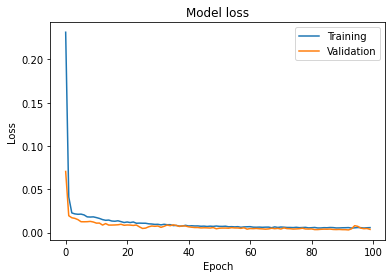

In [62]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## Model Predictions

### Pre-process Testing Dataset

After the model has been trained, its fit is assessed by feeding in the training data and comparing the model's predicted values to the actual values. Prior to this, the last T samples of the training dataset must be concatenated with the testing dataset to ensure the model has prior knowledge upon which to base its initial sample. T relates back to the time step or window size described in section 3.2.1.1.

In [63]:
# Add last [window_size] samples of the training dataset to the testing datset
train_last_samples=x_train.iloc[-PARAM_WINDOW_SIZE:]

# Concetenate the last 14 samples of the training set to the start of the test set
test_full = pd.concat((train_last_samples, x_test), axis=0)

# Print shape & head
display(test_full.tail())
display(test_full.shape)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,8950.200195,8956.639648,8934.549805,8945.650391,8945.650391,2025450000
2019-12-24,8955.009766,8957.120117,8934.360352,8952.879883,8952.879883,1014520000
2019-12-26,8970.209961,9022.459961,8968.459961,9022.389648,9022.389648,1634920000
2019-12-27,9049.469727,9052.000000,8987.320312,9006.620117,9006.620117,1832200000
2019-12-30,9004.450195,9006.360352,8909.190430,8945.990234,8945.990234,2042420000


(1016, 6)

This modified testing dataset must then be normalised using the same scalar as the training dataset to prevent data leakage

In [64]:
# Normalise dataset
X_test_norm = scaler_X.fit_transform(test_full)
y_test_norm = scaler_y.fit_transform(y_test)

display(pd.DataFrame(X_test_norm, columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']))
display(X_test_norm.shape)

,Open,High,Low,Close,Adj Close,Volume
0,-0.662709,-0.669760,-0.672272,-0.661747,-0.661747,-0.139191
1,-0.640480,-0.665729,-0.668119,-0.690589,-0.690589,-0.202771
2,-0.683782,-0.704433,-0.702120,-0.724011,-0.724011,0.649277
3,-0.694154,-0.716020,-0.698938,-0.704732,-0.704732,-0.304862
4,-0.681257,-0.699692,-0.684224,-0.691194,-0.691194,-0.358106
...,...,...,...,...,...,...
1011,0.958900,0.959922,0.977909,0.967726,0.967726,-0.144281
1012,0.960891,0.960124,0.977830,0.970767,0.970767,-0.605397
1013,0.967185,0.987585,0.992105,1.000000,1.000000,-0.322414
1014,1.000000,1.000000,1.000000,0.993368,0.993368,-0.232428


(1016, 6)

The data is then regularised into the same [B, T, D] structure as the training set for input into the LSTM-Attention model:

In [65]:
X_test_S = []

for i in range(PARAM_WINDOW_SIZE, X_test_norm.shape[0]):
    X_test_S.append(X_test_norm[i - PARAM_WINDOW_SIZE : i])
X_test_S = np.array(X_test_S)

print('X_train shape == {}.'.format(X_test_S.shape))

X_train shape == (1006, 10, 6).


### Make predictions

In [66]:
# Find the predicted values
predicted_stock_price = model.predict(X_test_S)

norm_values = predicted_stock_price

# Reverse normalise the values
predicted_stock_price = scaler_y.inverse_transform(predicted_stock_price)

# Convert to dataframe
predicted_stock_price = pd.DataFrame(predicted_stock_price)

# Name column
predicted_stock_price.columns=['Pred. Close']

# Set indicies of this df to the indicies of test_set
predicted_stock_price = predicted_stock_price.set_index(y_test.index)

# Display the first 10 predicted values
display(predicted_stock_price[:10])
display(predicted_stock_price.shape)

,Pred. Close
Date,
2015-12-31,5071.392090
2016-01-04,5058.574707
2016-01-05,5008.725586
2016-01-06,4972.401367
2016-01-07,4932.628906
2016-01-08,4870.451172
2016-01-11,4816.191895
2016-01-12,4772.571289
2016-01-13,4750.467285


(1006, 1)

### Results and Final Measurements

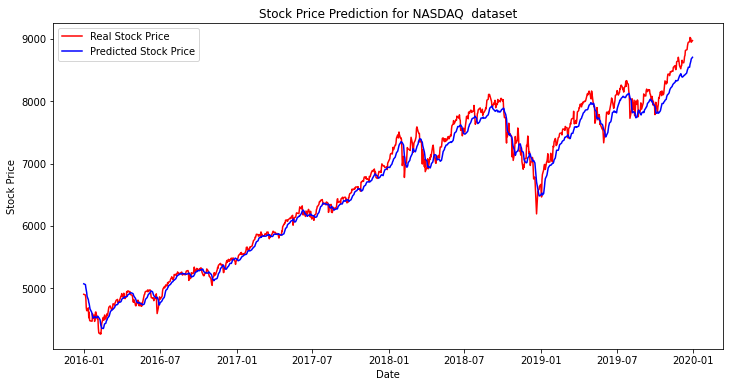

In [67]:
# Get the real values of the stock price
real_stock_price = y_test

# Plot the real vs predicted stock price values
plt.figure(figsize=(12, 6))
plt.plot(real_stock_price, color='red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction for ' + dataset_Name + " dataset")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Find the final performance metrics for the model predictions, discussed in Section 3.3.

In [68]:
def mean_directional_accuracy(actual: np.ndarray, predicted: np.ndarray):
  return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [69]:
# Calculate MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(real_stock_price, predicted_stock_price)

# Calculate RMSE
RMSE = mean_squared_error(real_stock_price, predicted_stock_price, squared=False)

# Calculate MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(real_stock_price, predicted_stock_price)

# Calculate R^2 value
from sklearn.metrics import r2_score
R2 = r2_score(real_stock_price, predicted_stock_price)

MDA = mean_directional_accuracy(real_stock_price.reset_index().drop(columns=['Date']).values, predicted_stock_price.reset_index().drop(columns=['Date']).values)

# Print results
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("MAE = ", MAE)
print("R2 = ", R2)
print("MDA = ", MDA)

MSE =  22108.328043503978
RMSE =  148.68869507633718
MAE =  117.9729979498012
R2 =  0.9847749417975108
MDA =  0.5482587064676617


# Trading Strategy

## Parameters

In [70]:
DATES = predicted_stock_price.index.tolist()
STARTING_MONEY = 1000000 
BUY_VALUE = 100000
SELL_VALUE = 100000
CASH_LIMIT = 500000
SHORT_LIMIT = 500000
THRESH_PROFIT = 250

## Naive

The system begins the simulation with a predetermined sum of money, in this example 1,000,000 USD, and then attempts to estimate the stock's closing price for the next day. If the stock price is anticipated to increase, the system will transmit signals to acquire 100,000 USD worth of stock, and if the price is anticipated to decrease, the model will short 100,000 USD worth of stock. The system will maintain a position for wait_time days following a purchase, and if during that period the acquired stock can be sold for a profit of threshold_profit the system will instantly sell the stock, or if during that period stock can be purchased at a price lower than the shorted price the system will immediately close the short position. If the wait_time period has expired and the stock or short position has not been sold or closed, the system will promptly terminate the position and, if required, incur a loss. At the beginning of every day, the system will calculate the percentage change in the actual stock price and increase or decrease the value of the stock or shorts it has acquired by the same amount. The duration of the simulation is proportional to the number of samples in the testing dataset used to create the model predictions. Upon completion of the simulation, all final positions are closed in order to calculate the final profitability metrics covered next in Section 3.3. Important to note, the proposed methodology is naïve and based on the assumptions that transaction costs are not considered and have no impact on profitability, and that created buy and sell orders are instantly executed and have no impact on the market.

In [71]:
def get_change(current, previous):
    if current == previous:
        return 0
    try:
        return ((current - previous) / previous) * 100.0
    except ZeroDivisionError:
        return 0

In [72]:
def naive_trading_strat(MAX_HOLD_TIME = PARAM_WINDOW_SIZE):

  available_money = STARTING_MONEY
  stock_value = 0
  short_value = 0
  days = 0
  holding_time = 0
  purchase_price = 0

  total_val_history = []

  for x in range(0, predicted_stock_price.size-1):
    
    # Print the current date
    print("\n", DATES[x])

    # Find and print the current price of the stock
    actual_price_string = "\tActual price = %.3f" % real_stock_price.iloc[x,0]
    if x == 0:
      print(actual_price_string)
    else: # If this isn't the first iteration, also print the % change from yesterday's price
      actual_price_difference = get_change(real_stock_price.iloc[x,0], real_stock_price.iloc[x-1,0])
      print(actual_price_string, "(%.3f" % actual_price_difference, "%)")

      # change investment values by change in stock
      if stock_value > 0:
        change_in_stock = stock_value * (actual_price_difference/100)
        stock_value = stock_value + change_in_stock
        print("\t\tStock changed by = ", change_in_stock, " to ", stock_value)
      if short_value > 0:
        change_in_short = short_value * (actual_price_difference/100) * -1
        short_value = short_value + change_in_short
        print("\t\tShort changed by = ", change_in_short, " to ", short_value) 

    purchase_position = True
    sell_position = False
    
    # If we are currently holding stock
    if stock_value > 0:

      # increment holding time
      holding_time = holding_time + 1
      print("\n\tCurrently holding Stock for ", holding_time, " days")

      # Has Simulation has held onto stock for MAX_HOLD_TIME days
      if holding_time == MAX_HOLD_TIME:
        sell_position = True
        print("\t\tLimit Reached")
      
      # Simulation hasn't held onto stock for MAX_HOLD_TIME days
      else:

        # Can stock be sold to make THRESH_PROFIT?
        if stock_value - purchase_price > THRESH_PROFIT:
          sell_position = True
          print("\tStock can be sold for profit of ", stock_value - purchase_price)

      # If the simulation has chosen to sell the stock
      if sell_position == True:
        
        # Sell stock
        print("\tSelling Stock")
        available_money = available_money + stock_value
        stock_value = 0

        # Reset variables as we are not holding any stocks anymore
        sell_position = False
        holding_time = 0
        purchase_price = 0

        # Print information
        print("\t\tPortfolio value = ", available_money + stock_value + short_value)
        print("\t\t\tCash = ", available_money)
        print("\t\t\tStock value = ", stock_value)
        print("\t\t\tShort value = ", short_value)

      # Sim has decided not to sell stock, so we do not purchase any more stock
      else:
        print("\t\tHolding Stock")
        purchase_position = False


    # If we are currently holding shorts
    elif short_value > 0:

      # increment holding time
      holding_time = holding_time + 1
      print("\n\tCurrently holding Short for ", holding_time, " days")

      # Has Simulation has held onto short for MAX_HOLD_TIME days
      if holding_time == MAX_HOLD_TIME:
        sell_position = True
        print("\t\tLimit Reached")
      
      # Simulation hasn't held onto short for MAX_HOLD_TIME days
      else: 

        # Can short be closed at price lower than the shorted price?
        if short_value - purchase_price > THRESH_PROFIT:
          sell_position = True
          print("\tShort can be closed for profit of ", short_value - purchase_price)

      # If the simulation has chosen to close the short
      if sell_position == True:

        # Close enitre short position
        print("\t\tClosing Short at ", real_stock_price.iloc[x,0])
        available_money = available_money + short_value
        short_value = 0

        # Reset variables as we are not holding any stocks anymore
        sell_position = False
        holding_time = 0
        purchase_price = 0

        # Print information
        print("\t\tPortfolio value = ", available_money + stock_value + short_value)
        print("\t\t\tCash = ", available_money)
        print("\t\t\tStock value = ", stock_value)
        print("\t\t\tShort value = ", short_value)

      # Sim has decided not to close short, so we do not purchase any more shorts
      else:
        purchase_position = False
        print("\t\tHolding Short")



    if purchase_position == True:
      print("\n\tPurchasing new position")

      # Find the percentage change in the market the model expects
      prediction = get_change(predicted_stock_price.iat[x+1,0], real_stock_price.iat[x,0])
      print("\t\tPred. change in price = %.3f" % prediction, "%")



      # Indicates a price rise, so purchase stock
      if prediction > 0: 


        # If we have no shorts, purchase stock normally
        if short_value == 0:

          # Check we are not at the min. amount of available money
          if available_money - BUY_VALUE > CASH_LIMIT:

            purchase_price = BUY_VALUE
            print("\t\tBuy Stock at ", real_stock_price.iloc[x,0])

            # Move money from cash to stock_value
            available_money = available_money - BUY_VALUE
            stock_value = stock_value + BUY_VALUE

          # Reached min. amount of available money, do nothing
          else:
            print("\t\tHit cash limit. No transaction excecuted.")


        elif short_value > 0: # We have shorts, so close them

          print("\t\tClosing Short at ", real_stock_price.iloc[x,0])

          # If we have less shorts than BUY_VALUE close the rest of the shorts
          if short_value < BUY_VALUE:
            available_money = available_money + short_value
            short_value = 0

          # Else just close BUY_VALUE of shorts
          else:
            available_money = available_money + BUY_VALUE
            short_value = short_value - BUY_VALUE



      elif prediction < 0: # PRICE FALL
        
        # If we have bought stock available sell it
        if stock_value > 0:

            print("\t\tSell Stock at ", real_stock_price.iloc[x,0])

            # if the value of our stock is less than the transaction volume sell it all
            if stock_value < SELL_VALUE:
              available_money = available_money + stock_value
              stock_value = 0
            else:
              available_money = available_money + SELL_VALUE
              stock_value = stock_value - SELL_VALUE

        # If we have no bought stock, short the stock
        else:

          # Check we wont go over the max short value
          if short_value < SHORT_LIMIT:

              print("\t\tShort at ", real_stock_price.iloc[x,0])
              purchase_price = SELL_VALUE

              # Move money from cash to short
              available_money = available_money - SELL_VALUE
              short_value = short_value + SELL_VALUE

          else:
            print("\t\tHit short limit. No transaction excecuted.")

    # Print information
    print("\n\tPortfolio value = ", available_money + stock_value + short_value)
    print("\t\tCash = ", available_money)
    print("\t\tStock value = ", stock_value)
    print("\t\tShort value = ", short_value)

    total_val_history.append(available_money + stock_value + short_value)

    days = days + 1

  total_profit = available_money + stock_value + short_value - STARTING_MONEY
  profitability = (((available_money + stock_value + short_value)/STARTING_MONEY)-1)*100
  profit_per_day = (available_money + stock_value + short_value - STARTING_MONEY) / days

  return total_val_history, total_profit, profitability, profit_per_day

naive_history, naive_profit, naive_profitability, naive_ppd = naive_trading_strat()

print("\nTotal profit = ", naive_profit)
print("Profitability = ", naive_profitability, "%")
print("Profit per day (PPD) = ", naive_ppd)
  

Streaming output truncated to the last 5000 lines.
	Portfolio value =  1008753.4236542454
		Cash =  909601.6377033105
		Stock value =  99151.78595093497
		Short value =  0

 2018-07-31 00:00:00
	Actual price = 7707.290 (0.463 %)
		Stock changed by =  458.80927180435776  to  99610.59522273933

	Currently holding Stock for  3  days
		Holding Stock

	Portfolio value =  1009212.2329260497
		Cash =  909601.6377033105
		Stock value =  99610.59522273933
		Short value =  0

 2018-08-01 00:00:00
	Actual price = 7802.690 (1.238 %)
		Stock changed by =  1232.9678795645855  to  100843.56310230392

	Currently holding Stock for  4  days
	Stock can be sold for profit of  843.5631023039168
	Selling Stock
		Portfolio value =  1010445.2008056144
			Cash =  1010445.2008056144
			Stock value =  0
			Short value =  0

	Purchasing new position
		Pred. change in price = -2.072 %
		Short at  7802.68994140625

	Portfolio value =  1010445.2008056144
		Cash =  910445.2008056144
		Stock value =  0
		Short value =

## Random

The random strategy functions similarly to the naive strategy, except that instead of forecasting the value for the following day the system creates a random number that determines whether the model will buy, sell, or hold on a particular day. 

In [73]:

def random_trading_strat():

  available_money = STARTING_MONEY
  stock_value = 0
  short_value = 0
  days = 0
  porfolio_history = []

  for x in range(0, predicted_stock_price.size):
    
    # Print the current date
    print("\n", DATES[x])

    # Find and print the current price of the stock
    actual_price_string = "\tActual price = %.3f" % real_stock_price.iloc[x,0]
    if x == 0:
      print(actual_price_string)
    else: # If this isn't the first iteration, also print the % change from yesterday's price
      actual_price_difference = get_change(real_stock_price.iloc[x,0], real_stock_price.iloc[x-1,0])
      print(actual_price_string, "(%.3f" % actual_price_difference, "%)")

      # change investment values by change in stock
      if stock_value > 0:
        change_in_stock = stock_value * (actual_price_difference/100)
        stock_value = stock_value + change_in_stock
        # print("\t\tStock changed by = ", change_in_stock, " to ", stock_value)
      if short_value > 0:
        change_in_short = short_value * (actual_price_difference/100) * -1
        short_value = short_value + change_in_short
        # print("\t\tShort changed by = ", change_in_short, " to ", short_value) 

      # Print information
      print("\t\tPortfolio value = ", available_money + stock_value + short_value)
      print("\t\t\tCash = ", available_money)
      print("\t\t\tStock value = ", stock_value)
      print("\t\t\tShort value = ", short_value)

    from random import randrange
    choice = randrange(3)

    if choice == 0: # buy

      print("\tDecision: Buy")

      # Close short (if we have short)
      if short_value > 0:

        print("\t\tClosing Short at ", real_stock_price.iloc[x,0])

        # If we have less shorts than BUY_VALUE close the rest of the shorts
        if short_value < BUY_VALUE:
          available_money = available_money + short_value
          short_value = 0

        # Else just close BUY_VALUE of shorts
        else:
          available_money = available_money + BUY_VALUE
          short_value = short_value - BUY_VALUE

      # Buy stock
      else:

          # Check we dont hit min cash limit
          if available_money - BUY_VALUE > CASH_LIMIT:

            print("\t\tBuying Stock at ", real_stock_price.iloc[x,0])

            # Move money from cash to stock_value
            available_money = available_money - BUY_VALUE
            stock_value = stock_value + BUY_VALUE

          # Reached min cash limit - do nothing
          else:
            print("\t\tHit cash limit. No transaction excecuted.")


    elif choice == 1: # sell

      print("\tDecision: Sell")

      if stock_value > 0: # sell stock if we are holding stock

        print("\t\tSell Stock at ", real_stock_price.iloc[x,0])

        # If we have less stock than SELL_VALUE sell the rest of the stock
        if stock_value < SELL_VALUE:
          available_money = available_money + stock_value
          stock_value = 0
        else:
          available_money = available_money + SELL_VALUE
          stock_value = stock_value - SELL_VALUE

      # Open short
      else: 

        # Check we wont go over the max short value
          if short_value + SELL_VALUE < SHORT_LIMIT:

              print("\t\tShort at ", real_stock_price.iloc[x,0])
            
              # Move money from cash to short
              available_money = available_money - SELL_VALUE
              short_value = short_value + SELL_VALUE

          else:
            print("\t\tHit short limit. No transaction excecuted.")


    elif choice == 2: # hold
      print("\tHolding Stock...")

    # Print information
    print("\n\tPortfolio value = ", available_money + stock_value + short_value)
    print("\t\tCash = ", available_money)
    print("\t\tStock value = ", stock_value)
    print("\t\tShort value = ", short_value)

    porfolio_history.append(available_money + stock_value + short_value)

    days = days + 1
  

  total_profit = available_money + stock_value + short_value - STARTING_MONEY
  profitability = (((available_money + stock_value + short_value)/STARTING_MONEY)-1)*100
  profit_per_day = (available_money + stock_value + short_value - STARTING_MONEY) / days

  return porfolio_history, total_profit, profitability, profit_per_day

random_history, rand_profit, rand_profitability, rand_ppd = random_trading_strat()

print("\nTotal profit = ", rand_profit)
print("Profitability = ", rand_profitability, "%")
print("Profit per day (PPD) = ", rand_ppd)
  

Streaming output truncated to the last 5000 lines.
	Decision: Sell
		Short at  7825.2998046875

	Portfolio value =  1014654.1686393038
		Cash =  551820.7325114713
		Stock value =  0
		Short value =  462833.4361278325

 2018-07-19 00:00:00
	Actual price = 7820.200 (-0.065 %)
		Portfolio value =  1014955.7889974818
			Cash =  551820.7325114713
			Stock value =  0
			Short value =  463135.0564860106
	Decision: Buy
		Closing Short at  7820.2001953125

	Portfolio value =  1014955.7889974818
		Cash =  651820.7325114713
		Stock value =  0
		Short value =  363135.0564860106

 2018-07-20 00:00:00
	Actual price = 7841.870 (0.277 %)
		Portfolio value =  1013949.5349237253
			Cash =  651820.7325114713
			Stock value =  0
			Short value =  362128.802412254
	Holding Stock...

	Portfolio value =  1013949.5349237253
		Cash =  651820.7325114713
		Stock value =  0
		Short value =  362128.802412254

 2018-07-23 00:00:00
	Actual price = 7840.770 (-0.014 %)
		Portfolio value =  1014000.3362046494
			Cash =

## Plot profitability

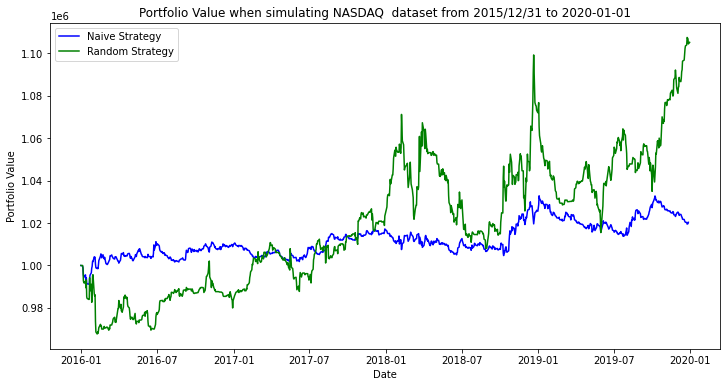

In [74]:
# Set up portfolio history list with dates as index
y_dates = y_test[:len(y_test)-1]
portfolio_history = pd.DataFrame(naive_history)
portfolio_history = portfolio_history.set_index(y_dates.index)

rand_portfolio_history = pd.DataFrame(random_history)
rand_portfolio_history = rand_portfolio_history.set_index(y_test.index)

# Plot the real vs predicted stock price values
plt.figure(figsize=(12, 6))
plt.plot(portfolio_history, color='blue', label='Naive Strategy')
plt.plot(rand_portfolio_history, color='green', label='Random Strategy')
plt.title('Portfolio Value when simulating ' + dataset_Name + " dataset from " + split_index + " to " + end_date)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

# Final Values for Project

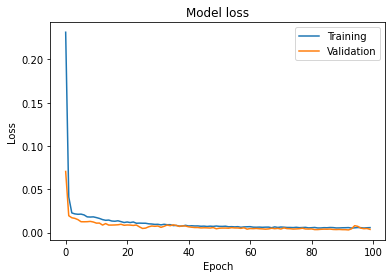

In [75]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

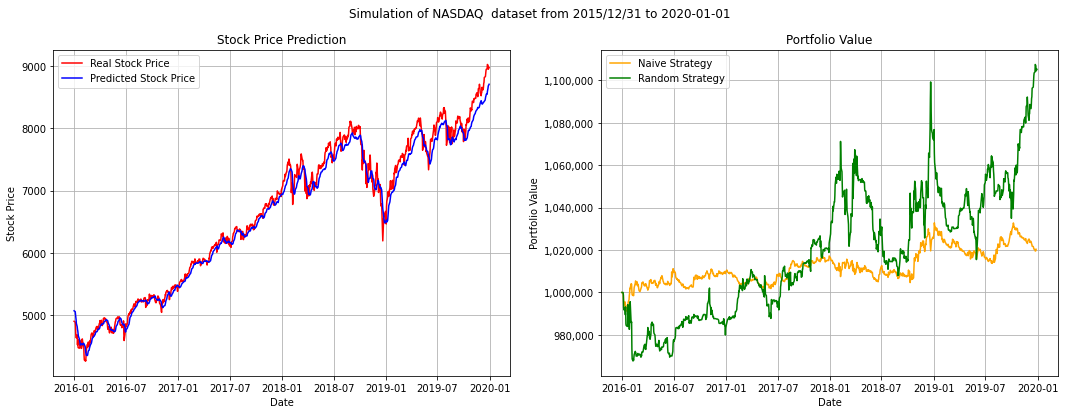

Nodes =  50
Batch size =  50
Epochs =  100
Window size =  10

MSE =  22108.328043503978
RMSE =  148.68869507633718
MAE =  117.9729979498012
R2 =  0.9847749417975108
MDA =  0.5482587064676617

Profitability =  2.0348345067954243 %
Profit per day (PPD) =  20.24710952035251


In [76]:
import matplotlib

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Simulation of ' + dataset_Name + ' dataset from ' + split_index + " to " + end_date)
fig.set_size_inches(18, 6, forward=True)

ax1.plot(real_stock_price, color='red', label = 'Real Stock Price')
ax1.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
ax1.set_title('Stock Price Prediction')
ax1.set(xlabel = 'Date', ylabel = 'Stock Price')
ax1.legend(loc="upper left")
ax1.grid(True)

ax2.plot(portfolio_history, color='orange', label='Naive Strategy')
ax2.plot(rand_portfolio_history, color='green', label='Random Strategy')
ax2.set_title('Portfolio Value')
ax2.set(xlabel = 'Date', ylabel = 'Portfolio Value')
ax2.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.legend(loc="upper left")
ax2.grid(True)

plt.show()

print("Nodes = ", HIDDEN_LAYER_NODES)
print("Batch size = ", PARAM_BATCH_SIZE)
print("Epochs = ", PARAM_EPOCHS)
print("Window size = ", PARAM_WINDOW_SIZE)

print("\nMSE = ", MSE)
print("RMSE = ", RMSE)
print("MAE = ", MAE)
print("R2 = ", R2)
print("MDA = ", MDA)

print("\nProfitability = ", naive_profitability, "%")
print("Profit per day (PPD) = ", naive_ppd)